#### Converts .pa to .h5 

In [23]:
from __future__ import print_function
%matplotlib inline

#!pip install ipykernel -U --force-reinstall

In [80]:
#!python setup.py install

import os
#!pip install Cython
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
bool_cmap = colors.ListedColormap([(1, 1, 1, 0), 'black'])

from fastadjust.simion import pa2fa
from fastadjust.io import h5write

In [81]:
# fast-adjust PA files
dire = r"C:\Users\r0867867\Documents\IonTrap_v2"
fils = [os.path.join(dire, fil) for fil in ['design.PA1', 'design.PA2']]

In [82]:
# 3D data
fa = pa2fa(fils)
# nx ny nz
print("PA shape:", fa.shape)
# number of electrodes
print("electrodes:", fa.num_el)

PA shape: (77, 77, 953)
electrodes: 2


In [83]:
dire_output = r"C:\Users\r0867867\Documents\fastadjust\data"
outfil = os.path.join(dire_output, "fast_adjust.h5" )
h5write(outfil, fa)

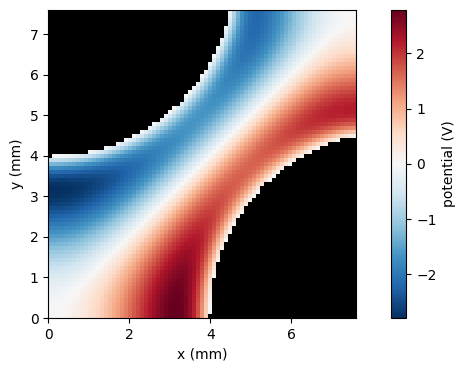

In [85]:
# z grid position
zg = 59
el = fa.electrode

# potential
voltages = np.array([20, -20], dtype='float64')

phi = fa.potential(voltages)

# plot
fig, ax = plt.subplots(figsize=(9, 4))
c0 = ax.imshow(el[:, :, zg].T, origin='lower', extent=fa.extent[:4] / 1e-3, cmap=bool_cmap, vmin=0, vmax=1, zorder=10)
c1 = ax.imshow(phi[:, :, zg].T, origin='lower', extent=fa.extent[:4] / 1e-3, cmap='RdBu_r')
cbar = fig.colorbar(c1, label='potential (V)')

# format
ax.set_aspect('equal')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
plt.show()